In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, probplot


df = pd.read_csv("edi_transacciones_2025.csv")



<h3>Descripción del dataset</h3>
<h5>Este comando nos muestra la cantidad de columnas y renglones nulos en el archivo</h5>

    

In [35]:
df.count()


Estatus                         16244
Transacción                     16244
Fecha de Transmisión            16244
Proveedor                       16244
Tamaño del Archivo (KB)         16244
Número de Documentos            15432
Estándar                        16244
Versión del Cliente             14656
Tipo de Error                   14659
Tiempo de Procesamiento (ms)    15432
Canal de Transmisión            16244
Sistema Receptor                15432
Prioridad del Mensaje           16244
Causa de la Falla               16244
Detectado                       16244
Reportado por Cliente Final     16244
Sistema Transmisor              16244
multa                           16244
dtype: int64

<h3>Revisión de dataset</h3>
<h5>Para ver una muestra de los datos, aplicamos este comando y podemos ver la naturaleza de los mismos, sus columnas y sus tipos. Ejecutamos el comando head.</h5>


In [36]:
df.head()

,Estatus,Transacción,Fecha de Transmisión,Proveedor,Tamaño del Archivo (KB),Número de Documentos,Estándar,Versión del Cliente,Tipo de Error,Tiempo de Procesamiento (ms),Canal de Transmisión,Sistema Receptor,Prioridad del Mensaje,Causa de la Falla,Detectado,Reportado por Cliente Final,Sistema Transmisor,multa
0,Éxito,856,2025-11-24,10749,442.74,65.0,EDIFACT,ECC6.0,Sin respuesta,1606.59,AS2,SAP,Media,Documento parcialmente transmitido,Sí,Sí,EPICOR,0.0
1,Falla,810,2025-02-27,5172,585.29,86.0,X12,S4HANA,Error de autenticación,2123.87,API,Legacy,Alta,Falta un campo mandatorio,No,Sí,SEEBURGER,258.0
2,Éxito,862,2025-01-13,10111,451.80,66.0,EDIFACT,R/3,Timeout,1639.47,API,WEBEDI,Baja,Mal encoding,No,Sí,LEGACY,0.0
3,Éxito,856,2025-05-21,8871,444.04,65.0,EDIFACT,NaN,Error de autenticación,1611.31,SFTP,VAN,Alta,Documento parcialmente transmitido,No,Sí,VAN,0.0
4,Éxito,830,2025-04-25,26702,376.54,55.0,EDIFACT,R/3,Timeout,1366.37,AS2,SAP,Alta,Formato no soportado,No,Sí,SEEBURGER,0.0


<h5>Si revisamos el archivo de manera general podemos localizar 18000 registros con 17 columnas con el comando shape.</h5>

In [37]:
df.shape

(16244, 18)

<h3>Revisión de características (columnas)</h3>
<h5>Este comando nos da la definición de las variables (características) de los datos en el archivo csv</h5>

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16244 entries, 0 to 16243
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Estatus                       16244 non-null  object 
 1   Transacción                   16244 non-null  int64  
 2   Fecha de Transmisión          16244 non-null  object 
 3   Proveedor                     16244 non-null  int64  
 4   Tamaño del Archivo (KB)       16244 non-null  float64
 5   Número de Documentos          15432 non-null  float64
 6   Estándar                      16244 non-null  object 
 7   Versión del Cliente           14656 non-null  object 
 8   Tipo de Error                 14659 non-null  object 
 9   Tiempo de Procesamiento (ms)  15432 non-null  float64
 10  Canal de Transmisión          16244 non-null  object 
 11  Sistema Receptor              15432 non-null  object 
 12  Prioridad del Mensaje         16244 non-null  object 
 13  C

<h5>Podemos ver que algunas propiedades o atributos del dataset estan en nulo. Tamaño del archivo, numero de documentos, version del cliente, tipo de error.</h5>

In [39]:
df.isnull().sum()

Estatus                            0
Transacción                        0
Fecha de Transmisión               0
Proveedor                          0
Tamaño del Archivo (KB)            0
Número de Documentos             812
Estándar                           0
Versión del Cliente             1588
Tipo de Error                   1585
Tiempo de Procesamiento (ms)     812
Canal de Transmisión               0
Sistema Receptor                 812
Prioridad del Mensaje              0
Causa de la Falla                  0
Detectado                          0
Reportado por Cliente Final        0
Sistema Transmisor                 0
multa                              0
dtype: int64

<h5>Esto nos da un informe de las columnas, sus tipos de datos, sus valores faltantes, minimos y maximos</h5>

In [40]:

# Crear tabla resumen
summary = pd.DataFrame({
    "Nombre de Columna": df.columns,
    "Tipo de Dato": df.dtypes.values,
    "Valores Faltantes": df.isnull().sum().values,
    "Valor Mínimo": [df[col].min() if pd.api.types.is_numeric_dtype(df[col]) else None for col in df.columns],
    "Valor Máximo": [df[col].max() if pd.api.types.is_numeric_dtype(df[col]) else None for col in df.columns]
})

# Mostrar la tabla
summary


,Nombre de Columna,Tipo de Dato,Valores Faltantes,Valor Mínimo,Valor Máximo
0,Estatus,object,0,NaN,NaN
1,Transacción,int64,0,810.00,862.00
2,Fecha de Transmisión,object,0,NaN,NaN
3,Proveedor,int64,0,1501.00,33568.00
4,Tamaño del Archivo (KB),float64,0,81.39,929.89
5,Número de Documentos,float64,812,12.00,136.00
6,Estándar,object,0,NaN,NaN
7,Versión del Cliente,object,1588,NaN,NaN
8,Tipo de Error,object,1585,NaN,NaN
9,Tiempo de Procesamiento (ms),float64,812,295.34,3374.33


<h3>ETL - Limpieza de Datos</h3>
Este código nos permite hacer una limpieza de los datos (nulos, duplicados, formato de fecha y numero)

In [47]:
# 1. Eliminar filas duplicadas
dflimpio = df.drop_duplicates()
# 2. Eliminar filas con valores nulos (opción básica)
dflimpio = dflimpio.dropna()


# 3. Validar tipos de datos (ejemplo: convertir a entero) - SEGUNDA TRANSFORMACIÓN
dflimpio['Número de Documentos'] = dflimpio['Número de Documentos'].astype('Int64')

# 4. Eliminar registros donde Estatus sea 'Éxito' nos interesan unicamente las fallas , y hay muchos falsos positivos
dflimpio = dflimpio[dflimpio["Estatus"] != 'Éxito'].copy()
dflimpio = dflimpio.dropna()  # Eliminar filas con valores nulos

# Verificar y corregir formatos incorrectos en las columnas de fecha
dflimpio['Fecha de Transmisión'] = pd.to_datetime(dflimpio['Fecha de Transmisión'], errors='coerce')

# Transformación de variables si es necesario
# Por ejemplo, convertir la columna "Estatus" a variable categórica
dflimpio['Estatus'] = dflimpio['Estatus'].astype('category')



<h4>Después de eliminar duplicados y limpiar los datos</h4>

In [48]:
# 5. Verificar cambios
print("Registros después de limpieza:", len(df))
dflimpio.info()

Registros después de limpieza: 16244
<class 'pandas.core.frame.DataFrame'>
Index: 2843 entries, 1 to 16242
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Estatus                       2843 non-null   category      
 1   Transacción                   2843 non-null   int64         
 2   Fecha de Transmisión          2843 non-null   datetime64[ns]
 3   Proveedor                     2843 non-null   int64         
 4   Tamaño del Archivo (KB)       2843 non-null   float64       
 5   Número de Documentos          2843 non-null   Int64         
 6   Estándar                      2843 non-null   object        
 7   Versión del Cliente           2843 non-null   object        
 8   Tipo de Error                 2843 non-null   object        
 9   Tiempo de Procesamiento (ms)  2843 non-null   float64       
 10  Canal de Transmisión          2843 non-null   object        
 1

<h3>ETL - Transformación de variables</h3>

<h5>Instalamos el scikit-learn para poder hacer algunas transformaciones de variables</h5>

In [43]:
!pip install scikit-learn


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [54]:
from sklearn.preprocessing import LabelEncoder

#Primero transformamos a enteros los numeros de documentos - TERCERA TRANSFORMACIÓN
dflimpio['Número de Documentos'] = dflimpio['Número de Documentos'].astype('Int64')

#Ahora agregamos una nueva columna para incorporar el tipo de error (ya que es categorico) y la llamamos Tipo de Error_Nu - CUARTA TRANSFORMACIÓN
le = LabelEncoder()
dflimpio['Tipo de Error'] = le.fit_transform(dflimpio['Tipo de Error'])



# Normalización o escalamiento de variables numéricas
# Seleccionar variables numéricas
numeric_cols = ['Tamaño del Archivo (KB)', 'Número de Documentos', 'Tiempo de Procesamiento (ms)', 'multa']

# Inicializar el escalador
scaler = StandardScaler()

# Aplicar escalamiento
dflimpio[numeric_cols] = scaler.fit_transform(dflimpio[numeric_cols])

dflimpio.head()


,Estatus,Transacción,Fecha de Transmisión,Proveedor,Tamaño del Archivo (KB),Número de Documentos,Estándar,Versión del Cliente,Tipo de Error,Tiempo de Procesamiento (ms),Canal de Transmisión,Sistema Receptor,Prioridad del Mensaje,Causa de la Falla,Detectado,Reportado por Cliente Final,Sistema Transmisor,multa
1,Falla,810,2025-02-27,5172,-0.891395,-0.824020,X12,S4HANA,1,-0.891373,API,Legacy,Alta,Falta un campo mandatorio,No,Sí,SEEBURGER,-0.913735
5,Falla,810,2025-03-13,31017,-1.041870,-0.968354,EDIFACT,ECC6.0,3,-1.041867,AS2,SAP,Media,Duplicado,No,Sí,SIMTEL,-1.095053
8,Falla,862,2025-02-14,4430,-0.460048,-0.391017,X12,410,4,-0.460041,API,Legacy,Baja,Formato no soportado,Sí,Sí,EPICOR,-0.369780
9,Falla,830,2025-10-30,12460,0.134032,0.186320,X12,ECC6.0,1,0.134017,SFTP,VAN,Baja,Formato no soportado,No,Sí,SIMTEL,0.355494
12,Falla,830,2025-02-17,18278,1.587849,1.629661,X12,S4HANA,4,1.587826,API,SAP,Alta,Fallo en unidades de medida,No,Sí,SEEBURGER,1.624722


<H3>Análisis Exploratorio de datos </H3>

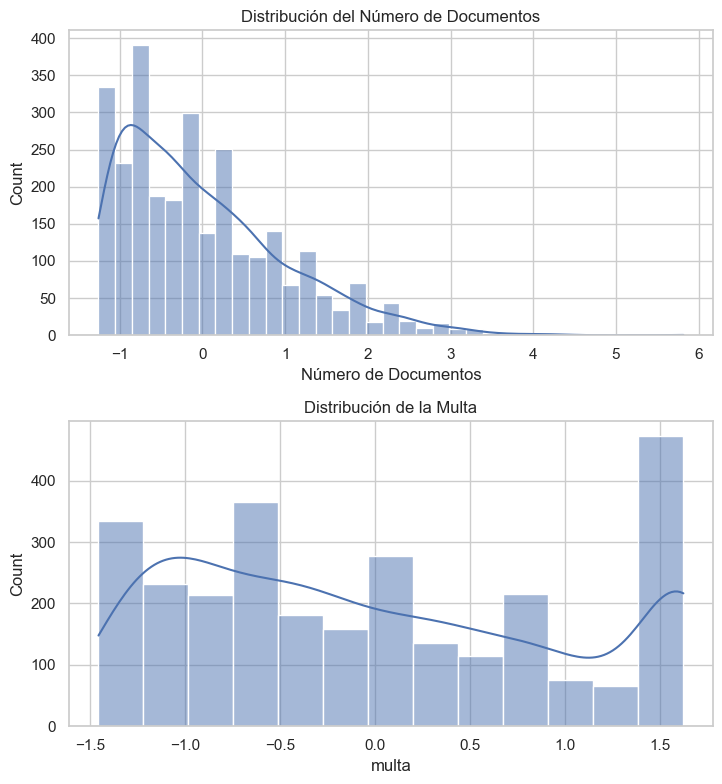

In [61]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo de visualización
sns.set(style="whitegrid")


# Análisis de la distribución de las variables numéricas
plt.figure(figsize=(14, 8))


# Histograma para la variable 'Número de Documentos'
plt.subplot(2, 2, 2)
sns.histplot(dflimpio['Número de Documentos'], kde=True)
plt.title('Distribución del Número de Documentos')

# Histograma para la variable 'multa'
plt.subplot(2, 2, 4)
sns.histplot(data_cleaned['multa'], kde=True)
plt.title('Distribución de la Multa')

plt.tight_layout()
plt.show()



<H4>Podemos observar que los datos de numero de documentos y multa no siguen distribuciones normales</H4>

<h3>Análisis Q-Q Plot</h3>

In [62]:
# Generar Q-Q plots para las variables numéricas
numeric_cols = ['Tamaño del Archivo (KB)', 'Número de Documentos', 'Tiempo de Procesamiento (ms)', 'multa']

for col in numeric_cols:
    plt.figure(figsize=(6, 6))
    stats.probplot(data[variable], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot de {variable}')
    plt.show()


NameError: name 'num_cols' is not defined

<h4>Observando las gráficas podemos concluir que todas las variables siguen distribuciones estandar</h4>

In [ ]:
import pandas as pd
from scipy.stats import normaltest


# Seleccionar columnas numéricas
num_cols = ['Tamaño del Archivo (KB)', 'Número de Documentos', 'Tiempo de Procesamiento (ms)']

# Lista para almacenar resultados
resultados = []

# Aplicar prueba de normalidad de D'Agostino y Pearson
for col in num_cols:
    datos = dflimpio[col].dropna()
    stat, p = normaltest(datos)
    distribucion = "Normal" if p > 0.05 else "No Normal"
    
    resultados.append({
        'Variable': col,
        'Estadístico': round(stat, 4),
        'p-valor': round(p, 4),
        'Distribución': distribucion
    })

# Convertir a DataFrame
resumen_normalidad = pd.DataFrame(resultados)

# Mostrar resultados
print("Resumen de pruebas de normalidad (D'Agostino y Pearson):")
display(resumen_normalidad)




<h4>La prueba de DAgostino u Pearson tambien muestra que son Distribuciones Normales</h4>

<h3>Normalización y estandarización de conjunto de datos</h3>

In [ ]:
# Paso 1: Importar librerías necesarias
import pandas as pd
from sklearn.preprocessing import StandardScaler


# Paso 3: Seleccionar las columnas que deseas estandarizar
columnas_a_estandarizar = ["Tamaño del Archivo (KB)", "Número de Documentos", "Tiempo de Procesamiento (ms)"]

# Paso 4: Inicializar el estandarizador
scaler = StandardScaler()

# Paso 5: Aplicar la estandarización
df_estandarizado = dflimpio.copy()
df_estandarizado[columnas_a_estandarizar] = scaler.fit_transform(dflimpio[columnas_a_estandarizar])

# Paso 6: Verificar los resultados
print(df_estandarizado.head())







<h4>
    Tras aplicar la estandarización, las variables numéricas clave fueron transformadas para tener media 0 y desviación estándar 1, lo que permite compararlas en una misma escala. Estas variables son:
1. Tamaño del Archivo (KB)
2. Número de Documentos
3. Tiempo de Procesamiento (ms)
</h4>



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Transformar el dataframe a formato largo para facilitar el boxplot
df_melted = dflimpio.melt(id_vars='Tipo de Error_Num',
                          value_vars=['Tamaño del Archivo (KB)', 'Número de Documentos', 'Tiempo de Procesamiento (ms)'],
                          var_name='Métrica',
                          value_name='Valor')

# Crear el boxplot con las métricas en el eje X y número de fallos en el eje Y
plt.figure(figsize=(10, 6))
sns.boxplot(x='Métrica', y='Tipo de Error_Num', data=df_melted)
plt.title('Número de Fallos por Métrica')
plt.xlabel('Métrica')
plt.ylabel('Número de Fallos')
plt.tight_layout()
plt.show()


# Transformar el dataframe a formato largo
df_melted_estandarizado = df_estandarizado.melt(id_vars='Tipo de Error_Num',
                                  value_vars=['Tamaño del Archivo (KB)', 'Número de Documentos', 'Tiempo de Procesamiento (ms)'],
                                  var_name='Métrica',
                                  value_name='Valor')

# Crear el boxplot con las métricas en el eje X y número de fallos en el eje Y
plt.figure(figsize=(10, 6))
sns.boxplot(x='Métrica', y='Tipo de Error_Num', data=df_melted_estandarizado)
plt.title('Número de Fallos por Métrica Estandarizadoo')
plt.xlabel('Métrica')
plt.ylabel('Número de Fallos')
plt.tight_layout()
plt.show()



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar las columnas relevantes
columnas = ['Tamaño del Archivo (KB)', 'Número de Documentos', 'Tiempo de Procesamiento (ms)']

# Calcular la matriz de correlación
correlation_matrix = df_estandarizado[columnas].corr()

# Crear el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Mapa de Calor de Correlaciones')
plt.tight_layout()
plt.show()
print(correlation_matrix)






<h3>Los datos están altamente relacionados: Es posible que el tamaño del archivo, el número de documentos y el tiempo de procesamiento estén creciendo juntos de forma proporcional en el dataset.</h3>


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular las correlaciones entre la cantidad de errores y las métricas
columnas = ['Tamaño del Archivo (KB)', 'Número de Documentos', 'Tiempo de Procesamiento (ms)', 'Tipo de Error_Num']
correlation_matrix = df_estandarizado[columnas].corr()
correlaciones = correlation_matrix.loc['Tipo de Error_Num'].drop('Tipo de Error_Num')
print("Correlaciones entre la cantidad total de errores y las métricas:")
print(correlaciones)

# Crear scatterplots para visualizar las relaciones
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
metricas = ['Tamaño del Archivo (KB)', 'Número de Documentos', 'Tiempo de Procesamiento (ms)']

for i, metrica in enumerate(metricas):
    sns.scatterplot(x=metrica, y='Tipo de Error_Num', data=df_estandarizado, ax=axes[i])
    axes[i].set_title(f'{metrica} vs Cantidad Total de Errores')
    axes[i].set_xlabel(metrica)
    axes[i].set_ylabel('Cantidad Total de Errores')

plt.tight_layout()
plt.show()


<h4>Los valores estan muy cerca de cero, lo cual quiere decir que el numero de errores no esta directamente relacionado con el tamaño del archivo</h4>

In [ ]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Tamaño del Archivo (KB)', y='Tiempo de Procesamiento (ms)', data=df_estandarizado, hue='Tipo de Error_Num', palette='viridis')
plt.title('Relación entre Tamaño del Archivo y Tiempo de Procesamiento')
plt.xlabel('Tamaño del Archivo (KB)')
plt.ylabel('Tiempo de Procesamiento (ms)')
plt.tight_layout()
plt.show()
